In [16]:
#Sets moduals for use in program
def module_import():
    import numpy as np
    import matplotlib as plt
    import csv
return

In [88]:
#Opens CSV File, returns data as unsorted list
def read_data(filename):
    with open(filename, newline='') as csvfile:
        file_data = list(csv.reader(csvfile))
    return file_data

In [89]:
#Takes data, sorts into items required for graph
def data_sort(file_data, GaussValueArray):
    IH = []
    Vh = []
    for item in file_data:#Sorting the values of magnetic filed strength in Gauss and Current to find IH
        if item[1] == "0.5":
            IH.append(float(GaussValueArray[0]) * float(item[2]))
        elif item[1] == "1":
            IH.append(float(GaussValueArray[1]) * float(item[2]))
        elif item[1] == "1.5":
            IH.append(float(GaussValueArray[2]) * float(item[2]))
        elif item[1] == "2":
            IH.append(float(GaussValueArray[3]) * float(item[2]))
        else:
            raise ValueError("Current of electromagnet doesn't equal 0.5, 1, 1.5, 2")
    for item in file_data:#Sorting voltage - z potential
        Vh.append(float(item[3]) - float(item[0].strip('\ufeff')))
        
    return IH, Vh

In [140]:
def plot_graph(IH, Vh, m, c, Title, X_axis, Y_axis):
    
    LOBFX = (-100, 100, 1000)
    LOBFY = []                        ###Trying to find line of best fit and plot it using found gradient and y intercept
    for i in LOBFX:
        LOBFY.append((i * m) - c)

    plt.rcdefaults()
    plt.figure()
    plt.title(Title)
    plt.xlabel(X_axis,fontsize=14)
    plt.ylabel(Y_axis,fontsize=14)
    plt.plot(Vh, IH, '.b')
    plt.plot(LOBFX, LOBFY)
    return

In [142]:
def line_of_best_fit(x, y):
    xbar = 0
    xn = 0
    ybar = 0
    yn = 0
    for item in x:#Mean of Y
        xbar = xbar + item
        xn = xn + 1
    xbar = xbar / xn
    
    for item in y:#Mean of Y
        ybar = ybar + item
        yn = yn + 1
    ybar = ybar / yn
    
    #Finding list of (xi - xbar)
    xi_list = []
    yi_list = []
    for item in x:
        xi_list.append(item - xbar)
    #list of (yi-ybar)
    for item in y:
        yi_list.append(item - ybar)
    
    #Finding gradient
    top_of_function = 0
    bottom_of_function = 0
    count = 0
    for item in xi_list:
        top_of_function = top_of_function + (item * yi_list[count])
    for item in xi_list:
        bottom_of_function = bottom_of_function + (item ** 2)
        
    gradient = top_of_function / bottom_of_function
    y_intercept = ybar - (gradient * xbar)
    print(gradient, y_intercept)
    return gradient, y_intercept
        

In [96]:
def model(a, IH):#Defining the linear model as Vh = R/Z * IH, so a0 = R/Z
    return a[0] * IH

1.77834548484206e-15 -37.55000000000001
1.77834548484206e-15 -37.55000000000001


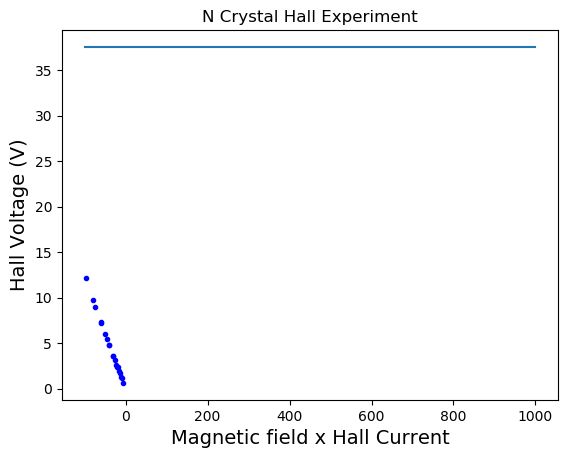

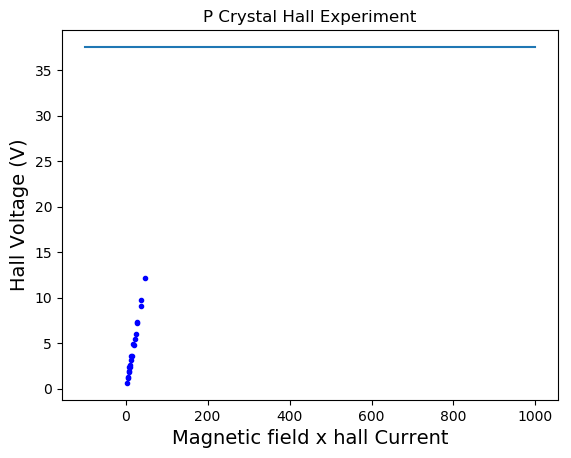

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import csv

ndata = read_data('ncrystal copy.csv')
pdata = read_data('pcrystal copy.csv')
GaussValueArray = [0.643, 1.210, 1.815, 2.440] #Readings of magnetic field at current readinsg of 0.5, 1, 1.5 , 2 mAmps

sorted_ndata = data_sort(ndata, GaussValueArray)
ndata_IH = sorted_ndata[0]
ndata_Vh = sorted_ndata[1]

nLOBF = line_of_best_fit(ndata_IH, ndata_Vh)
nLOBF_Gradient = nLOBF[0]
nLOBF_Y_Intercept = nLOBF[1]

plot_graph(ndata_IH, ndata_Vh, nLOBF_Gradient, nLOBF_Y_Intercept, 'N Crystal Hall Experiment', 'Magnetic field x Hall Current', 'Hall Voltage (V)')

sorted_pdata = data_sort(pdata, GaussValueArray)
pdata_IH = sorted_pdata[0]
pdata_Vh = sorted_pdata[1]

pLOBF = line_of_best_fit(ndata_IH, ndata_Vh)
pLOBF_Gradient = pLOBF[0]
pLOBF_Y_Intercept = pLOBF[1]

plot_graph(pdata_IH, pdata_Vh, pLOBF_Gradient, pLOBF_Y_Intercept,'P Crystal Hall Experiment', 'Magnetic field x hall Current', 'Hall Voltage (V)')